## データ前処理についての勉強
よりよい訓練データセットの構築について学ぶ

#### 欠測データへの対処
欠測データは予期せぬ結果を生み出す原因となる。

In [1]:
import pandas as pd
from io import StringIO
# サンプルデータの作成
csv_data =  '''A,B,C,D
            1.0,2.0,3.0,4.0
            5.0,6.0,,8.0
            10.0,11.0,12.0,'''
# CSVデータを読み込む
df = pd.read_csv(StringIO(csv_data))
print(df)


      A     B     C    D
0   1.0   2.0   3.0  4.0
1   5.0   6.0   NaN  8.0
2  10.0  11.0  12.0  NaN


##### 手法1 欠測データをもつ訓練データ/特徴量を削除

In [2]:
# 欠測値を含む行を削除
print(df.dropna())
# 欠測値を含む列を削除
print(df.dropna(axis = 1))
# すべての列がNaNである行を削除
print(df.dropna(how = 'all'))
# 非NaN値が4つ未満の行を削除
print(df.dropna(thresh = 4))
# 特定の列にNaNがある行を削除
print(df.dropna(subset = ['C']))

     A    B    C    D
0  1.0  2.0  3.0  4.0
      A     B
0   1.0   2.0
1   5.0   6.0
2  10.0  11.0
      A     B     C    D
0   1.0   2.0   3.0  4.0
1   5.0   6.0   NaN  8.0
2  10.0  11.0  12.0  NaN
     A    B    C    D
0  1.0  2.0  3.0  4.0
      A     B     C    D
0   1.0   2.0   3.0  4.0
2  10.0  11.0  12.0  NaN


データ点を削除すると解析の信頼性が失われる他、特徴量の列を削除しすぎると有益な情報を減らすことになる。一般に手法1は現実的ではない。
##### 手法2 補完法

以下は
sklearn.imputeモジュールからSimpleImputerクラスをインポートし、欠損値補完のインスタンスimrを生成。missing_values引数には、欠損値として扱う値を指定している。ここでは、np.nanを欠損値として扱うようにしている。また、strategy引数には、欠損値を補完する方法を指定している。ここでは、平均値を用いて欠損値を補完するようにしている。

欠損値補完のインスタンスimrに、Pandas DataFrameのdfをNumPy配列に変換したデータdf.valuesを入力して、欠損値補完のモデルを学習。fitメソッドは、入力されたデータを用いて欠損値補完のモデルを学習するメソッド。

学習済みのモデルimrを用いて、df.valuesの欠損値を平均値で補完し、補完後のデータをimputed_dataに代入する。transformメソッドは、学習済みのモデルを用いてデータを変換するメソッドであり、補完後のデータを返す。


In [4]:
"""平均値補完"""
from sklearn.impute import SimpleImputer
import numpy as np
# 欠測値補完のインスタンスを生成
imr = SimpleImputer(missing_values = np.nan, strategy = 'mean') #np.nanは欠損値を表す。その列の平均値で補完、最頻値はmost_frequent
# データを適合
imr = imr.fit(df.values) #df.valuesでnumpy配列に変換し、fitで学習
# 補完を実行
imputed_data = imr.transform(df.values) #transformはfitしたデータを変換する
print(imputed_data)


[[ 1.   2.   3.   4. ]
 [ 5.   6.   7.5  8. ]
 [10.  11.  12.   6. ]]


scikit-learnには変換器クラスと推定器クラスがある。
変換器クラスは、データの前処理や特徴量エンジニアリングなどのタスクを実行するためのクラス。具体的には、データの欠損値や異常値の処理、正規化、特徴量の選択や抽出、次元削減などのタスクを実行することができる。変換器は、fit()メソッドで変換器自身を学習し、transform()メソッドでデータを変換する。

推定器クラスは、データを学習し、予測するためのクラス。具体的には、教師あり学習の場合は入力データと対応するラベルデータを用いて、モデルを学習し、未知のデータに対して予測値を出力することができる。一方、教師なし学習の場合は、入力データだけを用いて、データの構造やパターンを解析し、その情報を用いてクラスタリングや次元削減などのタスクを実行することができる。推定器は、fit()メソッドを用いてデータを学習し、predict()メソッドを用いて予測を行う。
`前章でやったSVMやロジスティック回帰がこれにあたる。`

##### 数値データではなくカテゴリデータを扱う方法
カテゴリデータとは、Tシャツでいう青とか赤みたいな感じ。

In [5]:
import pandas as pd
# サンプルデータの作成(Tシャツの色・サイズ・価格・クラスラベル)
df = pd.DataFrame([['green', 'M', 10.1, 'class1'],
                     ['red', 'L', 13.5, 'class2'],
                        ['blue', 'XL', 15.3, 'class1']])
# 列名を設定
df.columns = ['color', 'size', 'price', 'classlabel']
print(df)


   color size  price classlabel
0  green    M   10.1     class1
1    red    L   13.5     class2
2   blue   XL   15.3     class1


sizeみたいな順序特徴量を正しく解釈させるには、文字列の値を整数に対応させる必要がある。

In [6]:
# Tシャツのサイズと整数を対応させる辞書を作成
size_mapping = {'XL': 3, 'L': 2, 'M': 1}
# Tシャツのサイズを整数に変換
df['size'] = df['size'].map(size_mapping) #mapメソッドは辞書のキーに対応する値を取り出す。要はキーと値を入れ替える
print(df)

   color  size  price classlabel
0  green     1   10.1     class1
1    red     2   13.5     class2
2   blue     3   15.3     class1


In [7]:
"""あとから整数値を元の文字列表現に戻したい場合"""
inv_size_mapping = {v: k for k, v in size_mapping.items()}
df['size'].map(inv_size_mapping) #変換された特徴量の列でmapメソッドを呼び出す

0     M
1     L
2    XL
Name: size, dtype: object

#### クラスラベルのエンコーディング
多くの機械学習ライブラリではクラスラベルは整数値としてエンコードされている必要がある。クラスラベルは順序は特にないから、0から順に番号付けすればok

In [8]:
import numpy as np
# クラスラベルと整数を対応させる辞書を作成
class_mapping = {label: idx for idx, label in 
                enumerate(np.unique(df['classlabel']))} #enumerateはインデックスと要素を取り出す(for文だけど、タプルで返す)
# np.uniqueは重複を除いた要素を取り出す
# for idx, label in enumerate(np.unique(df['classlabel']))
print(class_mapping)
#print('\n')
# クラスラベルを整数に変換
df['classlabel'] = df['classlabel'].map(class_mapping) #mapメソッドは辞書のキーに対応する値を取り出す。要はキーと値を入れ替える
print(df)


{'class1': 0, 'class2': 1}
   color  size  price  classlabel
0  green     1   10.1           0
1    red     2   13.5           1
2   blue     3   15.3           0


In [9]:
#整数からクラスラベルに変換する逆の辞書を作成
inv_class_mapping = {v: k for k, v in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


上の例では、なぜかclasslabelが最初から0, 1に自動変換されている。{class1: 0, class2: 1}となるはず。だから逆の辞書を作って元に戻すというコードだけど戻っていない
####  次のコードはクラスラベルを整数変換するための便利なクラスを使っている。

In [10]:
from sklearn.preprocessing import LabelEncoder
# ラベルエンコーダのインスタンスを生成
class_le = LabelEncoder()
# クラスラベルを整数に変換
y = class_le.fit_transform(df['classlabel'].values) #fit_transformはfitとtransformをまとめたもの
print(y)

#クラスラベルを元の文字列に戻す (今回の例では文字列がすでに整数に変換されているので、元に戻すことはできない)
class_le.inverse_transform(y)

[0 1 0]


array(['class1', 'class2', 'class1'], dtype=object)

#### ↖︎今まで使用したデータフレームについておさらい
```python
import pandas as pd
# サンプルデータの作成(Tシャツの色・サイズ・価格・クラスラベル)
df = pd.DataFrame([['green', 'M', 10.1, 'class1'],
                     ['red', 'L', 13.5, 'class2'],
                        ['blue', 'XL', 15.3, 'class1']])
# 列名を設定
df.columns = ['color', 'size', 'price', 'classlabel']
print(df)
```
サイズは順序特徴量なので、M, L, XLの順で1, 2, 3と変換した。クラスラベルは順序を持たないので、LabelEncoderを使って整数に変換した。では色について、blue→0, green→1, red→2と変換して良いのか？

#### 答えは「NO」
色には順序はないけれども、学習アルゴリズムはgreenが0よりも大きく、redがgreenよりも大きいと想定してしまう。これは正しくない。
これを避けるために`「one-hotエンコーティング」`という手法をつかう。

In [11]:
from sklearn.preprocessing import OneHotEncoder
"""このメソッドを使用することで、pandasのデータフレームやシリーズオブジェクトに含まれるデータを、
NumPyの多次元配列として扱うことができます。NumPyの配列は、高速な数値演算を行うことができるため、
データの加工や解析において、非常に有用なデータ形式となります。
"""
X = df[['color', 'size', 'price']].values #valuesはnumpy配列に変換
# one-hotエンコーダのインスタンスを生成
color_ohe = OneHotEncoder()
# one-hotエンコーディングを実行
"""reshape()関数は、NumPyの配列（array）オブジェクトに対して、その形状を変更するためのメソッドです。
具体的には、reshape()関数をNumPyの配列に適用すると、その配列の要素を、指定した形状に変形することができます。
たとえば、1次元の配列を2次元の行列に変形することができます。このとき、変形後の行列の要素数が元の配列の要素数と一致するように指定する必要があります。
reshape()関数は、元の配列自体を変更するのではなく、新しい配列を作成します。
そのため、元の配列の形状を変更する場合でも、元の配列自体を維持したまま操作することができます。
また、reshape()関数を用いて配列の形状を変更することで、配列のデータを別の形式で解釈することができます。
たとえば、1次元の配列を2次元の行列に変形することで、その配列を画像のピクセルデータとして解釈することができます。
"""
color_ohe.fit_transform(X[:, 0].reshape(-1, 1)).toarray() #X[:, 0]は0列目のcolorのこと、reshape(-1, 1)は1列の2次元配列に変換
#toarray()はnumpy配列に変換

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

上のコードで利用しているreshapeメソッド、reshape(1, -1)で１次元配列を２次元1行の配列に変換する。reshape(-1, 1)で１次元配列を２次元１列の配列にする。
 ```python
 import numpy as np
np.arange(6).reshape((1, -1))
np.arrange(6).reshape((-1, 1))
```
出力
```python
array([[0, 1, 2, 3, 4, 5]])
array([[0],
       [1],
       [2],
       [3],
       [4],
       [5]])
```


下のコードは、複数特徴量がある場合に、one-hotエンコーディングをする特徴量を選択して変換できるやり方
俺的にはこっちの方がありがたいかも

In [12]:
"""from sklearn.compose import ColumnTransformer
X = df[['color', 'size', 'price']].values #valuesはnumpy配列に変換
c_transf = ColumnTransformer([('onehot', OneHotEncoder(), [0]), 
                              ('nothing', 'passthrough', '[1, 2]')])#0列目のcolorをonehotエンコーディング、1,2列目のsize,priceはそのまま
c_transf.fit_transform(X) #astype(float)はfloat型に変換
"""
#上はエラーが出るので、下のようにする
# get_dummies関数は文字列値を持つ列のみをonehotエンコーディングできる
pd.get_dummies(df[['price', 'color', 'size']]) #pandasのget_dummies関数でもonehotエンコーディングができる




,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


one-hotエンコーディングは多重共線性を招き、正しい予測ができなくなる可能性もある。そんなときは特徴量を１つ削除し、相関を減らす。

In [13]:
pd.get_dummies(df[['price', 'color', 'size']], drop_first=True) #drop_first=Trueでダミー変数の最初の列を削除する

,price,size,color_green,color_red
0,10.1,1,1,0
1,13.5,2,0,1
2,15.3,3,0,0


以降は、Wineデータセットを使用する

In [16]:
df_wine = pd.read_csv('/Users/miyakyudai1928/python_flamework/機械学習/python_達人サイエンティスト/python-machine-learning-book-3rd-edition/ch04/wine.data', header = None)
#列名を指定, columnsは列名を指定する
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 
                'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 
                'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
#　クラスラベルを表示(uniqueで重複を除いた要素を取り出す)
print('Class labels', np.unique(df_wine['Class label']))
df_wine.head() #先頭5行を表示

Class labelss [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [17]:
from sklearn.model_selection import train_test_split
# valuesはnumpy配列に変換
#　特徴量(X)とクラスラベル(y)を別々に抽出する
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values #ilocは行番号を指定して抽出
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y) 
#stratify=yで層化抽出を行う



層化抽出とは、訓練セットとテストセットに含まれるクラスラベルの比率が、元のデータセットと同じになるようにすること

ここから、特徴量のスケーリングをしていく。スケーリングとは、`特徴量の尺度を揃える`こと。機械学習アルゴリズムにおいて、特徴量Aが1~10の値をとり、特徴量Bが1~10000の値を取る場合、尺度を揃えた方が遥かにうまく動作する。正規化は[0, 1]の範囲にスケーリングする。min-maxスケーリングと呼ばれる

In [18]:
from sklearn.preprocessing import MinMaxScaler
# MinMaxScalerのインスタンスを生成
nms = MinMaxScaler()
# 訓練データをスケーリング
X_train_norm = nms.fit_transform(X_train)
X_test_norm = nms.fit_transform(X_test)

実際に多くの機械学習で実用的なのが`標準化`である。標準化とは、平均値0, 標準偏差が1になるように変換する。正規分布に従うため、重みを学習しやすくなる。
要は、学習しやすくするために正規化するってこと

In [19]:
# min-maxスケーリング同様、preprocessingモジュールのStandardScalerクラスによって標準化が実装されている
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.fit_transform(X_test)


#### L1/L2正則化
モデルが訓練データにパラメータを適合させすぎてしまうと、未知のデータに対応できない(過学習)
この複雑さを軽減するのが`L1/L2正則化`
大きな重みにペナルティを課すことによって、モデルの複雑さを低減する。
簡単に２つの正則化の違いをまとめると
|  L1  |  L2  |
| ---- | ---- |
|  特徴量の一部が0になり、疎なモデルが作れる  |  特徴量を均等に扱う。平滑なモデルができる  |
|  一部を0にするので、ハズレ値の影響はあまり受けない。  |  ハズレ値に敏感  |

以下はL1正則化の実装


In [22]:
from sklearn.linear_model import LogisticRegression
# L1正則化を使用したロジスティック回帰のインスタンスを生成
lr = LogisticRegression(penalty = 'l1',C=1.0, solver = 'liblinear', multi_class = 'ovr')
# solverは最適化アルゴリズムを指定する, liblinearは小規模なデータセットに適している
lr.fit(X_train_std, y_train)
# 訓練データに対する正解率を表示
print('Training accuracy:', lr.score(X_train_std, y_train))
# テストデータに対する正解率を表示
print('Test accuracy:', lr.score(X_test_std, y_test))


Training accuracy: 1.0
Test accuracy: 1.0


In [24]:
print(lr.intercept_) #切片

lr.coef_ #重み係数, 一対他法を使用しているので、3行13列の重み係数が得られる

[-1.26356328 -1.21598659 -2.3700197 ]


array([[ 1.24604534,  0.18080398,  0.74345402, -1.1611498 ,  0.        ,
         0.        ,  1.17053334,  0.        ,  0.        ,  0.        ,
         0.        ,  0.54655288,  2.51037027],
       [-1.53688352, -0.38736186, -0.99525642,  0.36485645, -0.05962368,
         0.        ,  0.66843078,  0.        ,  0.        , -1.93424648,
         1.23326235,  0.        , -2.23214717],
       [ 0.13492326,  0.1694141 ,  0.35746937,  0.        ,  0.        ,
         0.        , -2.43348533,  0.        ,  0.        ,  1.56277485,
        -0.81882167, -0.49557886,  0.        ]])

L1正則化をより強めるには、パラメータCをもっと小さくする。以下は、パラメータCの値に応じて各特徴量の重みがどのように軽減されていくかを可視化したものである。

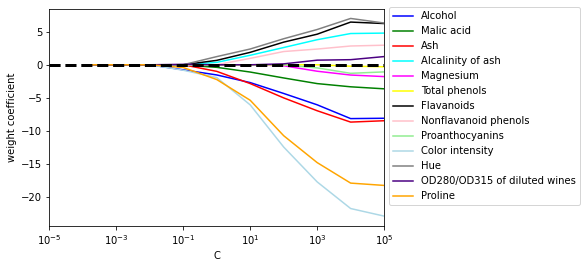

In [36]:
import matplotlib.pyplot as plt
fig = plt.figure() #figure()でグラフを描画するためのキャンバスを作成
ax = plt.subplot(111) #subplot()でキャンバスにグラフを描画するための領域を作成, 111は1行1列の1番目の領域
# 各係数の色を決める(13個)
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow',
        'black', 'pink', 'lightgreen', 'lightblue', 'gray', 'indigo', 'orange']
# 空のリストを用意
weights, params = [], []
#逆正則化パラメータCを10^-4から10^6まで変化させながら、ロジスティック回帰モデルを学習
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty ='l1', C=10**c, random_state=0, 
                            solver = 'liblinear', multi_class = 'ovr')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1]) #coef_[1]は重み係数の2行目を取り出す
    params.append(10**c) #paramsに逆正則化パラメータCを追加

# 重み係数をNumPy配列に変換
weights =np.array(weights)
# 重み係数をプロット
for column, color in zip(range(weights.shape[1]), colors): #12回ループして各特徴量のグラフを描画
    #zipで複数のリストを同時にループ処理, shape[1]は列数を取得(12個)
    plt.plot(params, weights[:, column], label = df_wine.columns[column+1], color = color)
    # column+1は1列目はClass labelなので、2列目から13列目までをプロット

plt.axhline(0, color = 'black', linestyle = '--', linewidth = 3) #水平線を描画
plt.xlim([10**(-5), 10**5]) #x軸の範囲を指定
# 軸ラベルの設定
plt.ylabel("weight coefficient") #重み係数
plt.xlabel("C")
# 横軸を対数スケールに設定
plt.xscale('log')
#plt.legend(loc = 'upper left') #凡例を左上に表示
ax.legend(loc = 'upper left', bbox_to_anchor = (1., 1.03), ncol = 1, fancybox = True)
# bbox_to_anchorで凡例の位置を調整, ncolで列数を指定, fancyboxで凡例の枠を丸くする
#ax.legendは
# グラフを表示
plt.show()



#### わかった!
凡例表示のplt.legendは、まず、グラフの左下が(0, 0), 右上が(1, 1)になってる。で、bbox_to_anchorは細かく座標を指定して、その座標を凡例のどこに合わせるかをlocで指定する。上の例だと、bbox_to_anchor = (1., 1.03)で指定した座標に、loc = 'upper left'だから左上端を合わせている。//

####　<モデルの複雑さの低減その１>特徴量選択


特徴量選択は、問題に最も関係のある特徴量の部分集合を選択する。こうすることで計算効率が改善される。また、無関係の特徴量を取り除くことで、汎化誤差を減らす。